In [1]:
import pandas as pd
import numpy as np

In [2]:
# problem who is my target customer 
# which category of customer we have to target
#our aim is only find the targeted group for penetration

In [3]:
mall=pd.read_csv('Mall_Customers.csv')

In [4]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [107]:
# in spending is not amount it is score 
# there is no information of score like 6 will be good or bad
#annual income in thousand 
# its raw problem 

In [108]:
mall.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [5]:
mall=mall.drop(['Genre','CustomerID','Age'],axis=1)

In [6]:
mall.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [8]:
scalemall=sc.fit_transform(mall)

In [9]:
scmall=pd.DataFrame(scalemall,columns=list(mall))
scmall.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [10]:
# applying clustering and then visualise the cluster
# finding the optimal cluster size 
#we calculating the wcss and hence create elbow plot

In [11]:
from sklearn.cluster import KMeans

In [12]:
inertia=[] # create list of inertia or variance 
cluster=range(1,10) # fitting diffrent cluster
for i in cluster:
    kmeans=KMeans(n_clusters=i)# fitting the model 
    kmeans.fit(scmall)
    inertia.append(kmeans.inertia_)

In [13]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'no of cluster')

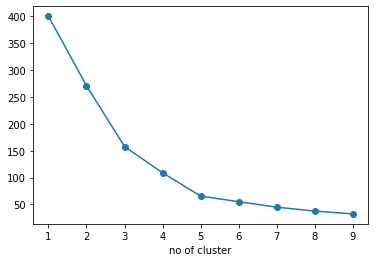

In [14]:
plt.plot(cluster,inertia,'o-') # plotting cluster on x axis
plt.xlabel('no of cluster')

In [15]:
# from elbow the method we found after 5 cluster not much change
# in inertia within inertia is very less 

In [16]:
kmeans=KMeans(n_clusters=5)# fitting the model 
kmeans.fit(scmall)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
# kmeans_labels giving the cluster names
# kmeans cluster centre give centroid

In [18]:
pd.DataFrame(kmeans.cluster_centers_,columns=list(mall))

,Annual Income (k$),Spending Score (1-100)
0,-0.200913,-0.026456
1,0.991583,1.239503
2,-1.329545,1.132178
3,1.055003,-1.284439
4,-1.307519,-1.136965


In [24]:
clusters=kmeans.predict(scmall)# it tells which column belong to that 
clusters                               # cluster

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [20]:
# it is predicting the record which record belong to that record

In [23]:
name_cluster=kmeans.labels_ # labels of cluster you can change the name of cluster 
name_cluster

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

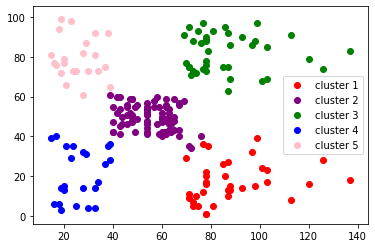

In [156]:
plt.scatter(mall.iloc[clusters==0,0],mall.iloc[clusters==0,1],color='red',label='cluster 1')
plt.scatter(mall.iloc[clusters==1,0],mall.iloc[clusters==1,1],color='purple',label='cluster 2')
plt.scatter(mall.iloc[clusters==2,0],mall.iloc[clusters==2,1],color='green',label='cluster 3')
plt.scatter(mall.iloc[clusters==3,0],mall.iloc[clusters==3,1],color='blue',label='cluster 4')
plt.scatter(mall.iloc[clusters==4,0],mall.iloc[clusters==4,1],color='pink',label='cluster 5')
plt.legend()
plt.show()

In [157]:
# from has much salary but not spent more
# they are much saving money
# cluster 4 has low salary and low spend 
# cluster 2 is average 
# cluster 5 is so risky because it has low salary and spend much
# cluster 3 has high salary and high spending 
# cluster 3 give the loan he has much spending and give him sale , offer
#cluster 1 has those customer who not spending money 
# our target is play with cluster with 1

In [164]:
mall[(mall['Annual Income (k$)']<40) & (mall['Spending Score (1-100)']>60)]['Age'].mean()

25.52173913043478

In [ ]:
# cluster 5 are those who are young people average age is 25 
# young has salary less but high spending money

In [165]:
mall[(mall['Annual Income (k$)']>70) & (mall['Spending Score (1-100)']<40)]['Age'].mean()

41.22222222222222

In [ ]:
# cluster 1 who has less spending money has average age is 41